### 06. 비선형 활성화 함수(Activation function)
- 비선형 활성화 함수는 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수이다. 
- 앞에서 공부한 시그모이느 함수나 소프트맥스 함수는 대표적인 활성화 함수 중 하나이다. 
- 이번 장에서는 인공 신경망의 은닉층에서 왜 활성화 함수로 시그모이드(sigmoid)함수를 사용하는 것을 왜 지양해야하는지와 은닉층에서 주로 사용되는 함수인 렐루(ReLU) 함수를 소개하고 그 외의 다른 활성화 함수들에 대해서도 공부한다.
- 이번 장에서는 그래프를 직접 그리면서 공부해보기 ! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

- 활성화 함수의 특징 : 선형 함수가 아니라 비선형 함수
    - 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수
        - 예를 들어 f(x) = Wx + b라는 함수가 있을 때, W와 b는 상수이다.
        - 이 식은 그래프를 그리면 직선이 그려진다. 
    - 비선형 함수 : 직선 1개로는 그릴 수 없는 함수

- 인공 신경망의 능력을 높이기 위해서는 **은닉층**을 계속해서 추가해야 하는데, 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수 없다.
    - 예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정(활성화 함수는 f(x) = Wx)
    - 여기다가 은닉층을 두 개 추가하다고 하면 출력층을 포함해서 y(x) = f(f(f(x)))가 되고, 이를 식으로 표현하면 W X W X W X x이다.
    - 그런데 이는 W의 세제곱을 k라고 정의해버리면 y(x) = kx와 같이 다시 표현이 가능하다. 
    - 즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 거소가 차이를 줄 수 없다. 
    
- 선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 것은 아니고, 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있다. 
    - 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)나 투사층(projection layer) 등의 다른 표현을 사용하여 표현하기도 한다. 
    - 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)이다. 

--------------------------------------------------------------------------------------------------------------

#### 2. 시그모이드 함수와 기울기 소실

시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정했을 때, 학습 과정은 다음과 같다. 
- 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산
- 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수를 통해 계산
- 이 손실을 미분을 통해 기울기를 구한다.
- 이를 통해 역전파(back propagation)을 수행한다.

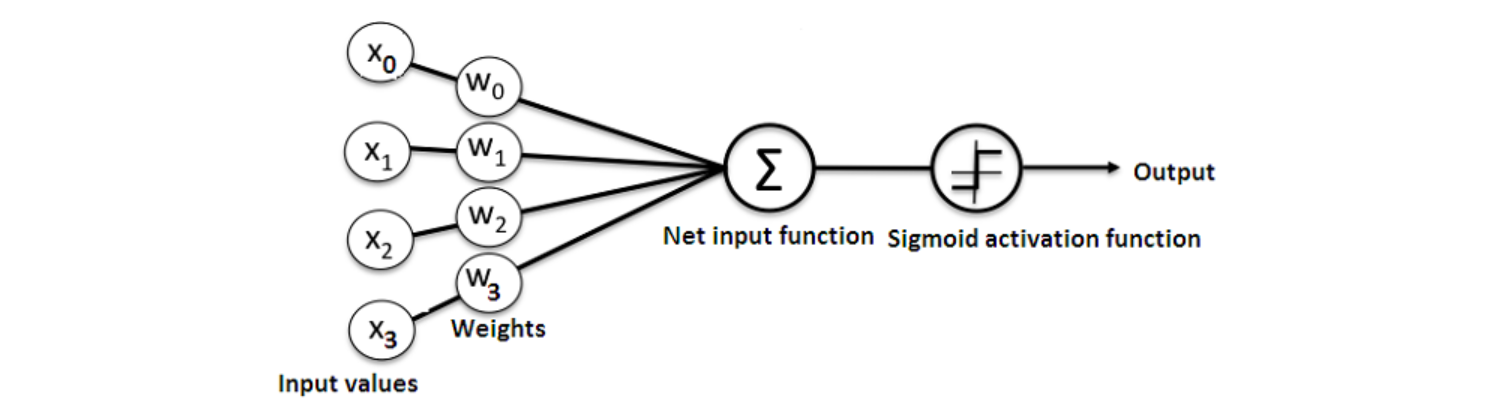

In [33]:
from IPython.display import Image
Image("s1.PNG")

시그모이드 함수의 문제점 : 미분을 해서 기울기(gradient)를 구할 때 발생

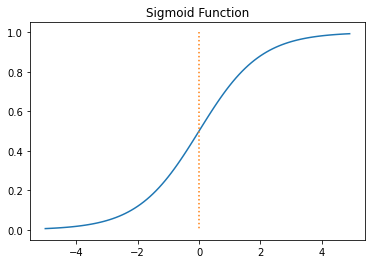

In [6]:
# 시그모이드 함수 그래프 그리기
def sigmoid(x) : 
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

- 위 그래프를 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해진다. (기울기가 완만-주황색, 그렇지 않는 구간-초록색)
    - 주황색 부분 : 기울기가 계산되면 0에 가까운 아주 작은 값이 나온다.
    - 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않는다. 
    - 이러한 현상을 **기울기 소실(Vanishing Gradient)문제**라고 한다. 

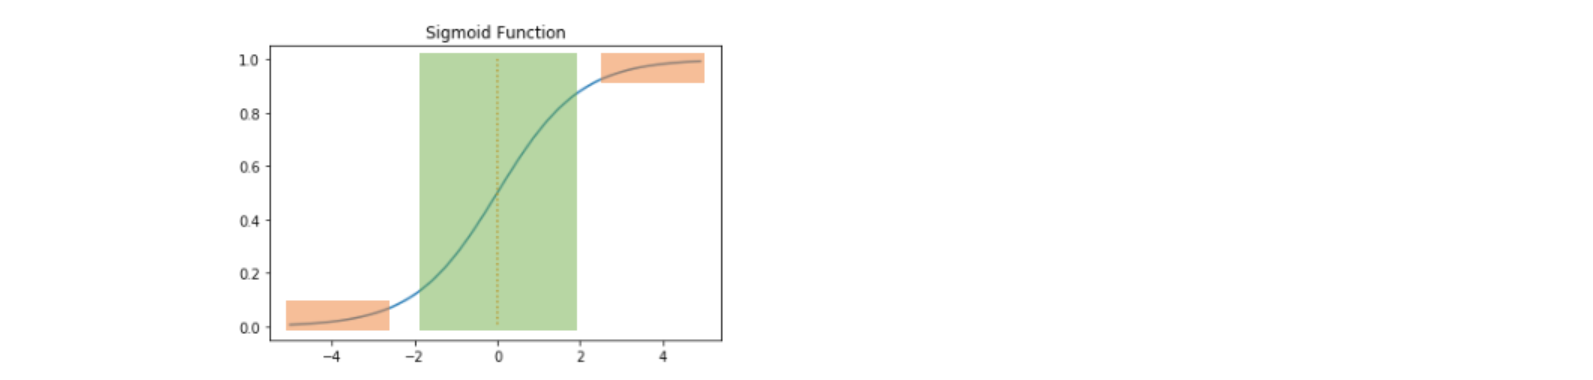

In [7]:
Image("s3.PNG")

- 시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전달받을 수 없게 된다.
- 즉, 매개변수 W가 업데이트 되지 않아 학습이 되지 않는다.
- 아래의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제가 발생하게 되면 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여준다.
- 결론적으로 **시그모이드 함수를 은닉층에서 사용하는 것은 지양**된다. 

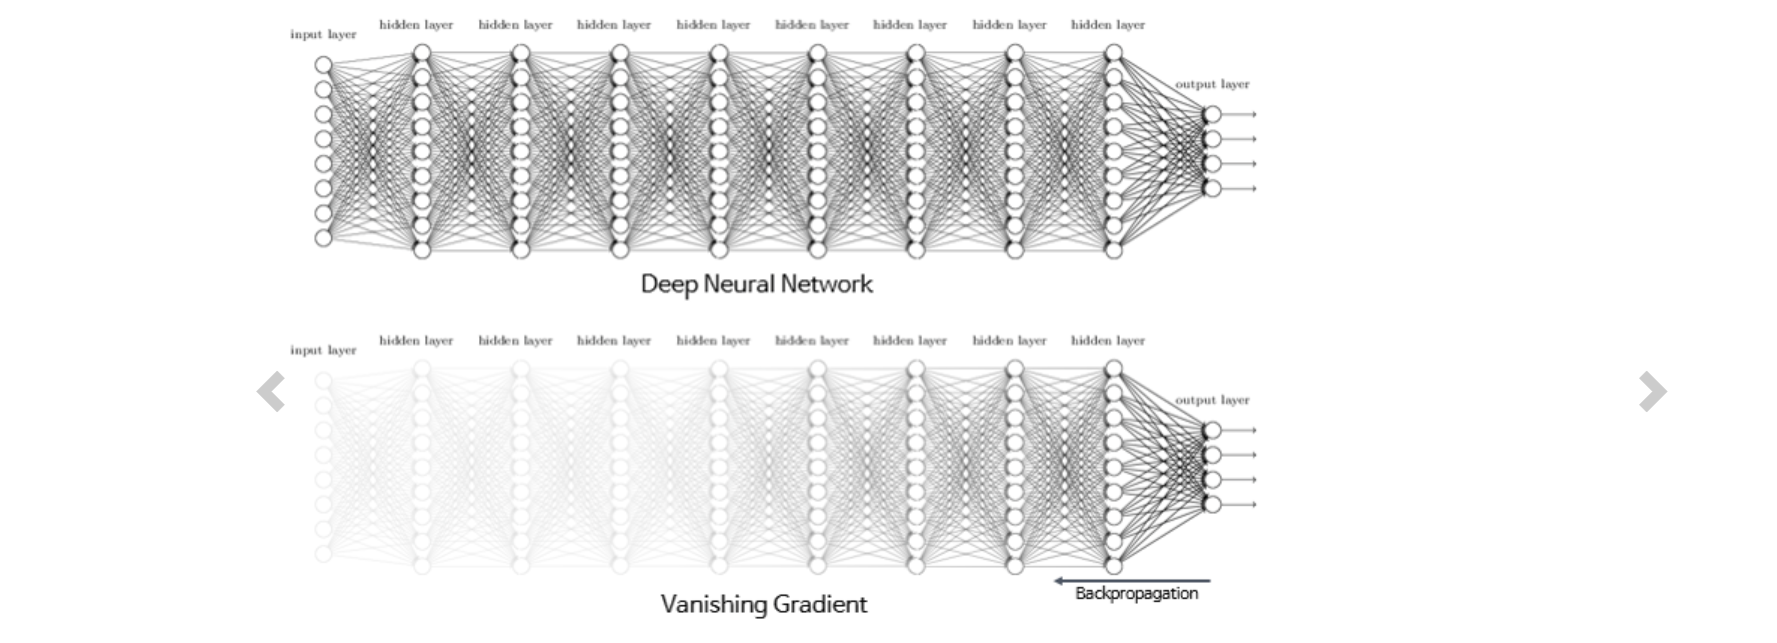

In [8]:
Image("s4.PNG")

------------------------------------------------------------------------------------------------------------

#### 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)
- 하이퍼볼릭탄젠트 함수(tanh)는 **입력값을 -1과 1사이의 값으로 변환**한다. 
- 그래프 그려보기

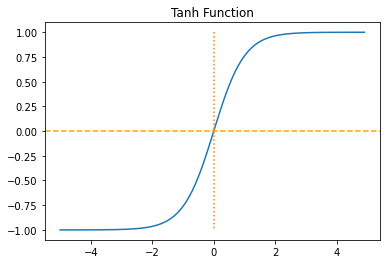

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(0,color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

- 하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생한다.
- 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 **0을 중심**으로 하고 있다.
- 이때문에 시그모이드 함수와 비교하면 **반환값의 변환폭이 더 크다**.
- 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은편이므로 은닉층에서 시그모이드 함수보다는 많이 사용된다.  

------------------------------------------------------------------------------------------------------------

#### 4. 렐루 함수(ReLU)
- 인공 신경망에서 가장 최고의 인기를 얻고 있는 함수이다. 
- 수식은 **f(x) = max(0, x)** 로 아주 간단하다. 

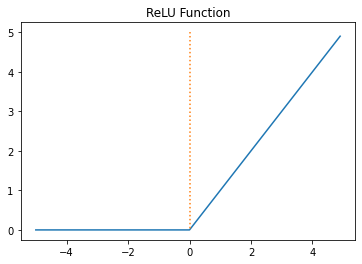

In [19]:
def relu(x) : 
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('ReLU Function')
plt.show()

- 특징
    - 렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다.
- 장점
    - 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다.
    - 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도고 빠르다.
- 단점
    - 입력값이 음수면 기울기도 0이 된다.
    - 이 뉴런은 다시 회생하는 것이 매우 어렵다.(이 문제를 죽은 렐루라고 한다.)


-----------------------------------------------------------------------------------------------------------

#### 5. 리키 렐루(Leaky ReLU)
- 죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했다. 변형 함수는 여러개가 있지만 지금은 Leaky ReLU에 대해서만 공부한다.
- Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있다.
- 수식은 f(x) = max(ax, x)로 아주 간단하다.
    - a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가진다.
    - 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있다. 
- 아래의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 설정하였다.
- 아래와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않는다.

In [28]:
a = 0.1

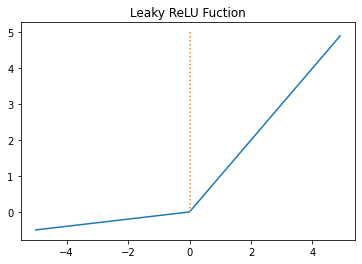

In [30]:
def leaky_relu(x) : 
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Fuction')
plt.show()

-------------------------------------------------------------------------------------------------------------

#### 6. 소프트맥스 함수

1. 출력층 vs 은닉층
    - 출력층
        - 대부분 시그모이드 함수, 소프트맥스 함수가 사용된다. 
    - 은닉층
        - 대부분 ReLU, Leaky ReLU 함수들을 사용한다.
        - 하지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아니다.

2. 분류로 나눠보기
    - 로지스틱 회귀
        - 두 가지 선택지 중 하나를 고르는 이진분류(Binary Classification)문제
        - 시그모이드 함수를 사용한다. 
        - 대부분 출력층에 적용하여 사용한다. 
    - 소프트맥스 회귀
        - 세 가지 이상의 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification)문제
        - 소프트맥스 함수를 사용한다.
        - 대부분 출력층에 적용하여 사용한다. 

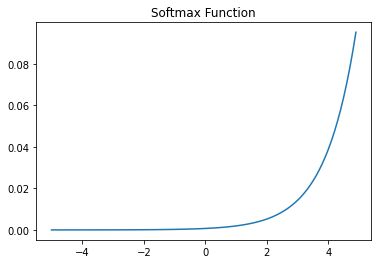

In [31]:
# -5.0부터 5.0까지 0.1간격 생성
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

-------------------------------------------------------------------------------------------------------------

#### 6. 출력층의 활성화 함수와 오차 함수의 관계

- 은닉층의 활성화 함ㅅ : ReLU 또는 Leaky ReLU와 같은 ReLU의 변형을 사용
- 출력층은 ?
    - 각 문제에 따른 출력층의 활성화 함수와 비용함수의 관계를 정리해보면 아래와 같다.
    - 다중 레이블 분류도 있지만 아직까지는 공부 X
    - 단, **nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있다.**

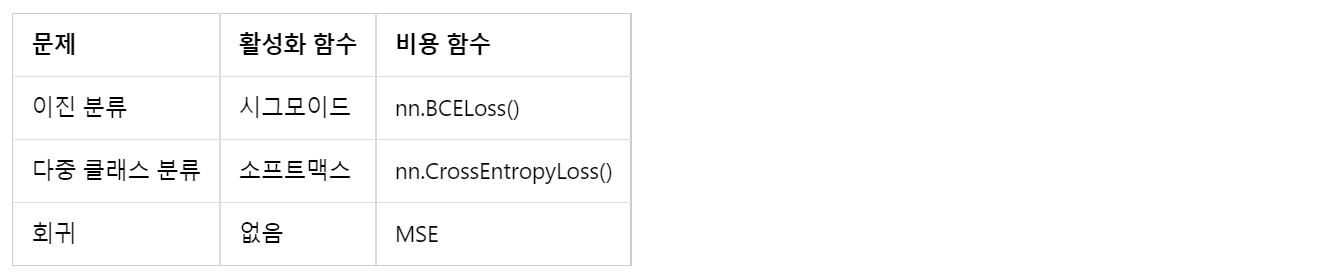

In [34]:
Image("s5.PNG")

-------------------------------------------------------------------------------------------------------------

**[추가 설명]**

1. 시그모이드 함수
- 원점 중심이 아니다. 
- 따라서 평균이 0이 아니라 0.5이며, 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다.
- 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 된다.
- 결국 기울기 소실 문제가 일어날 수 있다.

2. 하이퍼볼릭탄젠트 함수
- 원점 중심이기 때문에 시그모이드와 달리 편향 이동은 일어나지 않는다.
- 하지만 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이때 기울기가 완만해진다.
- 결국 기울기 소실 문제가 일어날 수 있다.

3. cs231n 강의에서는 ReLU를 먼저 시도해보고 -> LeakyReLU나 ELU와 같은 ReLU의 변형들을 시도해보며, sigmoid는 사용하지 말라고 권장한다. 